# Interactive SUMMA Modeling with Bokeh

## Overview

* <b> Why Bokeh? What is it? What can it do? </b>   
Bokeh is a python plotting library that renders html documents and lets you interactively explore your data.  


* <b> Case Study 1: Snow water drainage (from Homework 1F) </b>   
Examine the effects on snow water equivalent and drainage by changing the capillary retention, hydraulic conductivity, and melt water exponent parameters. 


* <b> Case Study 2: Albedo (from Homework 1E) </b>   
Examine the effects on snow water equivalent, drainage and surface temperature by changing the albedo decay rate parameter, as well as switching between a variable and constant decay rate.

<b> Team </b>  
Michelle Hu  
Friedrich Knuth  
Steven Pestana  

<b> GitHub </b>  
https://github.com/spestana/summa-bokeh


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import xarray as xr
import numpy as np
import pandas as pd
import datetime

In [2]:
# set up function to read in data
def create_dfs(path,file):
    '''create df for swe, snow drainage from SUMMA .nc file'''
    ds = xr.open_dataset(path+file)
    
    # create swe dataframe
    df_swe = ds.scalarSWE.to_dataframe()
    df_swe = df_swe.reset_index(level='hru')
    df_swe.drop(['hru'], 1, inplace=True)
    
    # create snow drainage dataframe
    df_sd = ds.scalarSnowDrainage.to_dataframe()
    df_sd = df_sd.reset_index(level='hru')
    df_sd.drop(['hru'], 1, inplace=True)
    
    return [df_swe, df_sd]

***
## Load SUMMA model outputs for snow water drainage example (from Homework 1F)

<b>run 1</b> - use the default setup

<b>run 2</b> - reduce the capillary retention by a factor of three

<b>run 3</b> - double the hydraulic conductivity of snow

<b>run 4</b> - set exponent of melt water flow to 1.0

<b>run 5</b> - combine all previous changes

In [3]:
f_path = '/home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/output/'

[df_swe_default, df_sd_default] = create_dfs(f_path,'reynolds_output_CLM_2010_r1_timestep.nc')
[df_swe_fcapil, df_sd_fcapil] = create_dfs(f_path,'reynolds_output_CLM_2010_r2_timestep.nc')
[df_swe_ksnow, df_sd_ksnow] = create_dfs(f_path,'reynolds_output_CLM_2010_r3_timestep.nc')
[df_swe_mwexp, df_sd_mwexp] = create_dfs(f_path,'reynolds_output_CLM_2010_r4_timestep.nc')
[df_swe_all, df_sd_all] = create_dfs(f_path,'reynolds_output_CLM_2010_r5_timestep.nc')

# concatenate dataframes
swe_runs_combine = pd.concat([df_swe_default, 
                              df_swe_fcapil, 
                              df_swe_ksnow, 
                              df_swe_mwexp, 
                              df_swe_all], axis=1)
swe_runs_combine.columns = ['defaults', 'reduced Fcapil', 'doubled K_snow', 'changed mw_exp', 'all combined']

sd_runs_combine = pd.concat([df_sd_default, 
                             df_sd_fcapil, 
                             df_sd_ksnow, 
                             df_sd_mwexp, 
                             df_sd_all], axis=1)
sd_runs_combine.columns = ['defaults', 'reduced Fcapil', 'doubled K_snow', 'changed mw_exp', 'all combined']

***
## Analysis

## Four years

Text(0,0.5,'Drainage from the bottom of the snow profile \n (instant) [m s-1]')

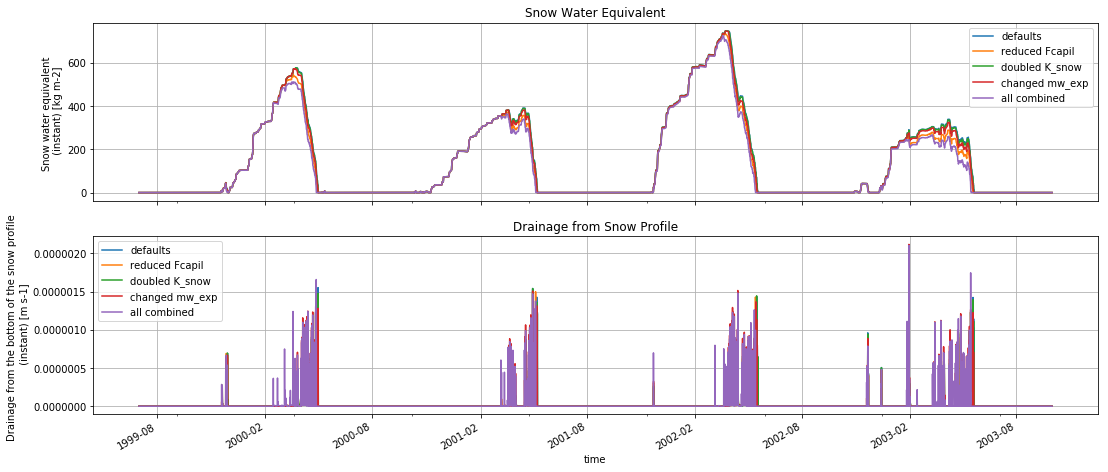

In [4]:
fig, axes = plt.subplots(nrows=2,
                         ncols=1,
                         sharex=True)

ax = swe_runs_combine.plot(
    ax=axes[0], 
    figsize=(18,8), 
    grid=True, 
    title='Snow Water Equivalent'
)
ax.set_ylabel("Snow water equivalent \n (instant) [kg m-2]")


ax = sd_runs_combine.plot(
    ax=axes[1], 
    figsize=(18,8), 
    grid=True, 
    title='Drainage from Snow Profile'
)
ax.set_ylabel("Drainage from the bottom of the snow profile \n (instant) [m s-1]")

## One Year

(730759.0, 731123.0)

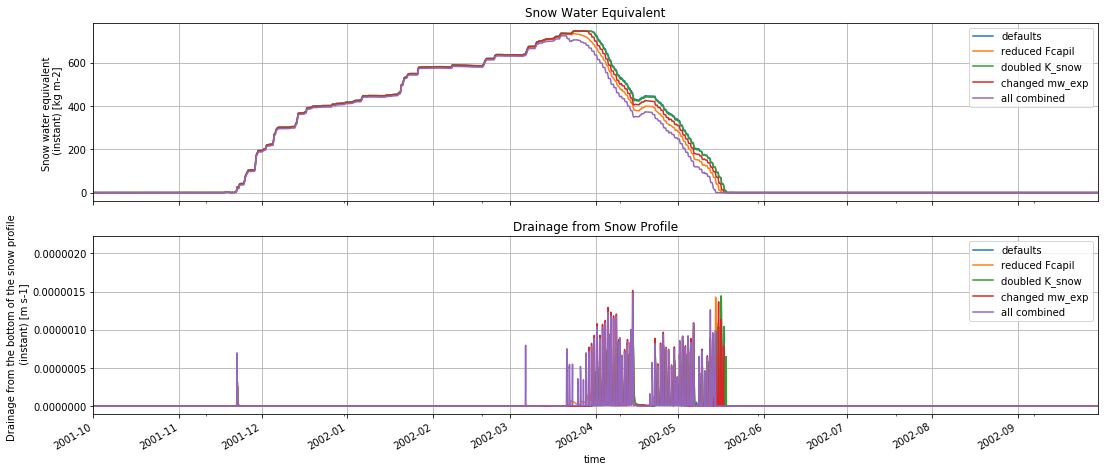

In [5]:
fig, axes = plt.subplots(nrows=2,
                         ncols=1,
                         sharex=True)

ax = swe_runs_combine.plot(
    ax=axes[0], 
    figsize=(18,8), 
    grid=True, 
    title='Snow Water Equivalent'
)
ax.set_ylabel("Snow water equivalent \n (instant) [kg m-2]")

ax = sd_runs_combine.plot(
    ax=axes[1], 
    figsize=(18,8), 
    grid=True, 
    title='Drainage from Snow Profile'
)
ax.set_ylabel("Drainage from the bottom of the snow profile \n (instant) [m s-1]")

months = dates.MonthLocator()
ax.xaxis.set_major_locator(months)
ax.set_xlim(datetime.datetime(2001, 10, 1, 0, 0),datetime.datetime(2002, 9, 30, 0, 0))

## Melt Season March to June

Text(0,0.5,'Drainage from the bottom of the snow profile \n (instant) [m s-1]')

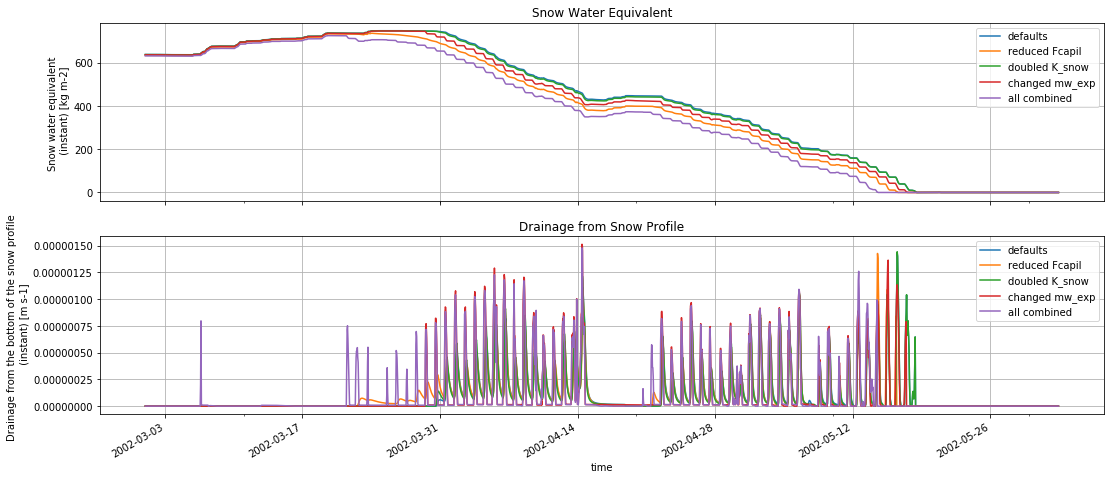

In [6]:
fig, axes = plt.subplots(nrows=2,
                         ncols=1,
                         sharex=True)

ax = swe_runs_combine['3/01/2002':'6/01/2002'].plot(
    ax=axes[0], 
    figsize=(18,8), 
    grid=True, 
    title='Snow Water Equivalent'
)
ax.set_ylabel("Snow water equivalent \n (instant) [kg m-2]")

ax = sd_runs_combine['3/01/2002':'6/01/2002'].plot(
    ax=axes[1], 
    figsize=(18,8), 
    grid=True, 
    title='Drainage from Snow Profile'
)
ax.set_ylabel("Drainage from the bottom of the snow profile \n (instant) [m s-1]")

## Start of Melt Season March 15 - 30

Text(0,0.5,'Drainage from the bottom of the snow profile \n (instant) [m s-1]')

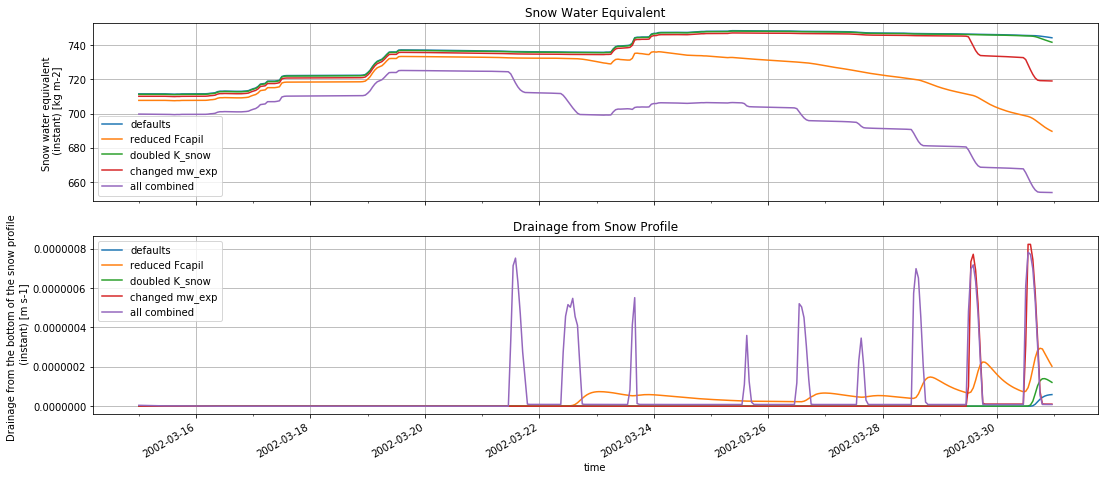

In [7]:
fig, axes = plt.subplots(nrows=2,
                         ncols=1,
                         sharex=True)

ax = swe_runs_combine['3/15/2002':'3/30/2002'].plot(
    ax=axes[0], 
    figsize=(18,8), 
    grid=True, 
    title='Snow Water Equivalent'
)
ax.set_ylabel("Snow water equivalent \n (instant) [kg m-2]")

ax = sd_runs_combine['3/15/2002':'3/30/2002'].plot(
    ax=axes[1], 
    figsize=(18,8), 
    grid=True, 
    title='Drainage from Snow Profile'
)
ax.set_ylabel("Drainage from the bottom of the snow profile \n (instant) [m s-1]")

## Mid Melt Season April 12 - 25

Text(0,0.5,'Drainage from the bottom of the snow profile \n (instant) [m s-1]')

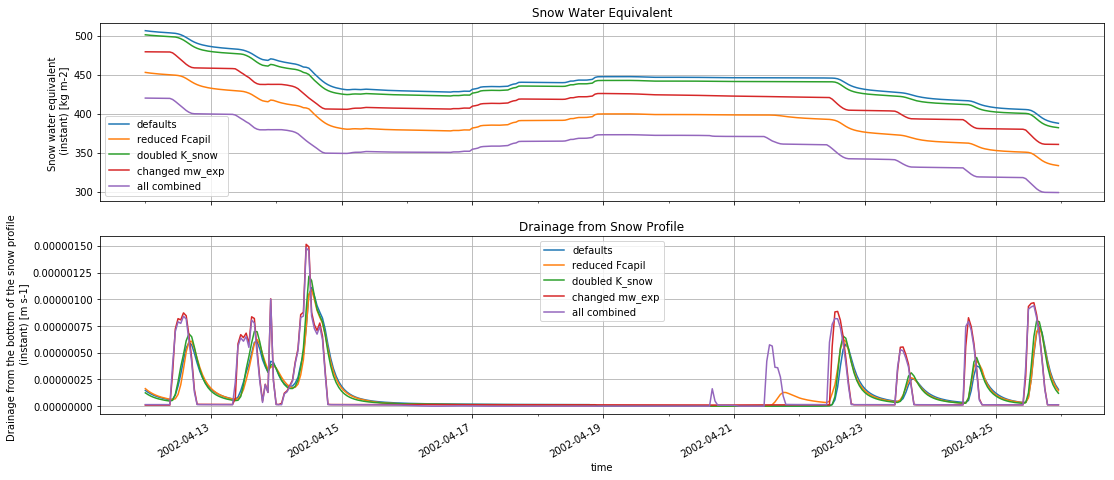

In [8]:
fig, axes = plt.subplots(nrows=2,
                         ncols=1,
                         sharex=True)

ax = swe_runs_combine['4/12/2002':'4/25/2002'].plot(
    ax=axes[0], 
    figsize=(18,8), 
    grid=True, 
    title='Snow Water Equivalent'
)
ax.set_ylabel("Snow water equivalent \n (instant) [kg m-2]")

ax = sd_runs_combine['4/12/2002':'4/25/2002'].plot(
    ax=axes[1], 
    figsize=(18,8), 
    grid=True, 
    title='Drainage from Snow Profile'
)
ax.set_ylabel("Drainage from the bottom of the snow profile \n (instant) [m s-1]")

## End of Melt Season May 12 - 20

Text(0,0.5,'Drainage from the bottom of the snow profile \n (instant) [m s-1]')

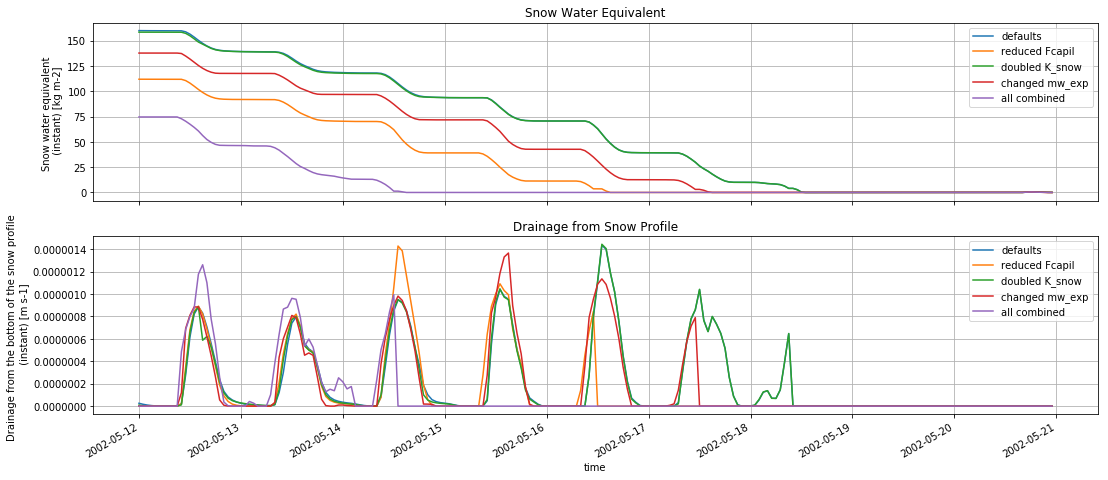

In [9]:
fig, axes = plt.subplots(nrows=2,
                         ncols=1,
                         sharex=True)

ax = swe_runs_combine['5/12/2002':'5/20/2002'].plot(
    ax=axes[0], 
    figsize=(18,8), 
    grid=True, 
    title='Snow Water Equivalent'
)
ax.set_ylabel("Snow water equivalent \n (instant) [kg m-2]")

ax = sd_runs_combine['5/12/2002':'5/20/2002'].plot(
    ax=axes[1], 
    figsize=(18,8), 
    grid=True, 
    title='Drainage from Snow Profile'
)
ax.set_ylabel("Drainage from the bottom of the snow profile \n (instant) [m s-1]")

In [10]:
sd_runs_combine_hourly = sd_runs_combine.resample("H").mean()
swe_runs_combine_hourly = swe_runs_combine.resample("H").mean()

Text(0,0.5,'Drainage from the bottom of the snow profile \n (instant) [m s-1]')

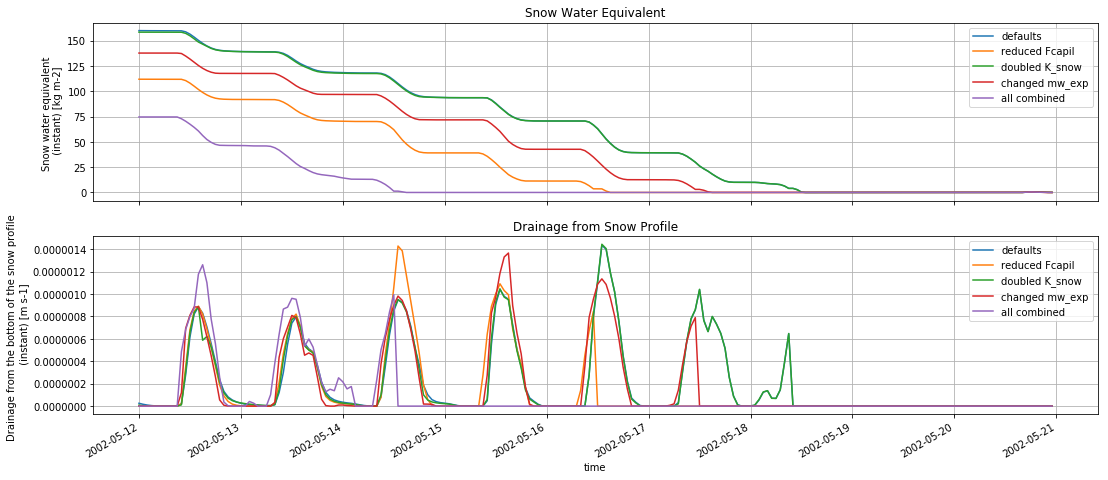

In [11]:
fig, axes = plt.subplots(nrows=2,
                         ncols=1,
                         sharex=True)

ax = swe_runs_combine['5/12/2002':'5/20/2002'].plot(
    ax=axes[0], 
    figsize=(18,8), 
    grid=True, 
    title='Snow Water Equivalent'
)
ax.set_ylabel("Snow water equivalent \n (instant) [kg m-2]")

ax = sd_runs_combine['5/12/2002':'5/20/2002'].plot(
    ax=axes[1], 
    figsize=(18,8), 
    grid=True, 
    title='Drainage from Snow Profile'
)
ax.set_ylabel("Drainage from the bottom of the snow profile \n (instant) [m s-1]")

In [12]:
from bokeh.plotting import figure, output_file, reset_output, show, ColumnDataSource, save
from bokeh.layouts import column, gridplot
from bokeh.models import BoxAnnotation
from bokeh.io import output_notebook

# Why Bokeh?

## Single interactive plot

In [13]:
source = ColumnDataSource(
    data = dict(
        x = list(sd_runs_combine.index.values),
        y0 = list(sd_runs_combine['defaults'].values),
        y1 = list(sd_runs_combine['reduced Fcapil'].values),
        y2 = list(sd_runs_combine['doubled K_snow'].values),
        y3 = list(sd_runs_combine['changed mw_exp'].values),
        y4 = list(sd_runs_combine['all combined'].values),
    )
)

s = figure(width = 800,
           height = 400,
           x_axis_type = 'datetime',
           title='Drainage from Snow Profile',
           x_axis_label='Time',
           y_axis_label="Drainage from the bottom of the snow profile \n (instant) [m s-1]")


s.line('x', 'y0', source=source, line_width=1,  line_color="blue", legend="defaults")
s.line('x', 'y1', source=source, line_width=1, line_color="orange", legend="reduced Fcapil")
s.line('x', 'y2', source=source, line_width=1, line_color="green", legend="doubled K_snow")
s.line('x', 'y3', source=source, line_width=1, line_color="red", legend="changed mw_exp")
s.line('x', 'y4', source=source, line_width=1, line_color="purple", legend="all combined")


output_notebook()
show(column(s))

Loading BokehJS ...

## Two plots linked via x-axis

In [14]:
source = ColumnDataSource(
    data = dict(
        x = list(sd_runs_combine.index.values),
        y0 = list(sd_runs_combine['defaults'].values),
        y1 = list(sd_runs_combine['reduced Fcapil'].values),
        y2 = list(sd_runs_combine['doubled K_snow'].values),
        y3 = list(sd_runs_combine['changed mw_exp'].values),
        y4 = list(sd_runs_combine['all combined'].values),
        y5 = list(swe_runs_combine['defaults'].values),
        y6 = list(swe_runs_combine['reduced Fcapil'].values),
        y7 = list(swe_runs_combine['doubled K_snow'].values),
        y8 = list(swe_runs_combine['changed mw_exp'].values),
        y9 = list(swe_runs_combine['all combined'].values)
    )
)


s = figure(width = 500,
           height = 400,
           x_axis_type = 'datetime',
           title='Drainage from Snow Profile',
           x_axis_label='Time',
           y_axis_label="Drainage from the bottom of the snow profile \n (instant) [m s-1]")


s.line('x', 'y0', source=source, line_width=1,  line_color="blue", legend="defaults")
s.line('x', 'y1', source=source, line_width=1, line_color="orange", legend="reduced Fcapil")
s.line('x', 'y2', source=source, line_width=1, line_color="green", legend="doubled K_snow")
s.line('x', 'y3', source=source, line_width=1, line_color="red", legend="changed mw_exp")
s.line('x', 'y4', source=source, line_width=1, line_color="purple", legend="all combined")


s1 = figure(width = 500,
           height = 400,
           x_axis_type = 'datetime',
           x_range=s.x_range,
           title='Snow Water Equivalent',
           x_axis_label='Time',
           y_axis_label="Snow water equivalent \n (instant) [kg m-2]")


s1.line('x', 'y5', source=source, line_width=1, line_color="blue", legend="defaults")
s1.line('x', 'y6', source=source, line_width=1, line_color="orange", legend="reduced Fcapil")
s1.line('x', 'y7', source=source, line_width=1, line_color="green", legend="doubled K_snow")
s1.line('x', 'y8', source=source, line_width=1, line_color="green", legend="changed mw_exp")
s1.line('x', 'y9', source=source, line_width=1, line_color="purple", legend="all combined")

p = gridplot([[s,s1]])


output_notebook()
show(p)

Loading BokehJS ...

# Two plots linked via x-axis and selection - saved as sharable html file

In [15]:
source = ColumnDataSource(
    data = dict(
        x = list(sd_runs_combine.index.values),
        y0 = list(sd_runs_combine['defaults'].values),
        y1 = list(sd_runs_combine['reduced Fcapil'].values),
        y2 = list(sd_runs_combine['doubled K_snow'].values),
        y3 = list(sd_runs_combine['changed mw_exp'].values),
        y4 = list(sd_runs_combine['all combined'].values),
        y5 = list(swe_runs_combine['defaults'].values),
        y6 = list(swe_runs_combine['reduced Fcapil'].values),
        y7 = list(swe_runs_combine['doubled K_snow'].values),
        y8 = list(swe_runs_combine['changed mw_exp'].values),
        y9 = list(swe_runs_combine['all combined'].values)
    )
)

TOOLS = "pan,hover,wheel_zoom,box_zoom,box_select,undo,redo,reset,save,,help"

s = figure(tools=TOOLS,
           width = 600,
           height = 400,
           x_axis_type = 'datetime',
           title='Drainage from Snow Profile',
           x_axis_label='Time',
           y_axis_label="Drainage from the bottom of the snow profile \n (instant) [m s-1]")


s.line('x', 'y0', source=source, line_width=1,  line_color="blue", legend="defaults")
s.circle('x', 'y0', source=source, size=2, color="blue")
s.line('x', 'y1', source=source, line_width=1, line_color="orange", legend="reduced Fcapil")
s.circle('x', 'y1', source=source, size=2, color="orange")
s.line('x', 'y2', source=source, line_width=1, line_color="green", legend="doubled K_snow")
s.circle('x', 'y2', source=source, size=2, color="green")
s.line('x', 'y3', source=source, line_width=1, line_color="red", legend="changed mw_exp")
s.circle('x', 'y3', source=source, size=2, color="red")
s.line('x', 'y4', source=source, line_width=1, line_color="purple", legend="all combined")
s.circle('x', 'y4', source=source, size=2, color="purple")


s1 = figure(tools=TOOLS,
            width = 600,
            height = 400,
            x_axis_type = 'datetime',
            x_range=s.x_range,
            title='Snow Water Equivalent',
            x_axis_label='Time',
            y_axis_label="Snow water equivalent \n (instant) [kg m-2]")


s1.line('x', 'y5', source=source, line_width=1, line_color="blue", legend="defaults")
s1.circle('x', 'y5', source=source, size=2, color="blue")
s1.line('x', 'y6', source=source, line_width=1, line_color="orange", legend="reduced Fcapil")
s1.circle('x', 'y6', source=source, size=2, color="orange")
s1.line('x', 'y7', source=source, line_width=1, line_color="green", legend="doubled K_snow")
s1.circle('x', 'y7', source=source, size=2, color="green")
s1.line('x', 'y8', source=source, line_width=1, line_color="green", legend="changed mw_exp")
s1.circle('x', 'y8', source=source, size=2, color="green")
s1.line('x', 'y9', source=source, line_width=1, line_color="purple", legend="all combined")
s1.circle('x', 'y9', source=source, size=2, color="purple")

p = gridplot([[s,s1]])



output_file("snow_drainage.html")
save(p)

'/home/jovyan/summa-bokeh/snow_drainage.html'